<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/9_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 예제 설명
* 새로운 생선이 추가로 도착할 때마다 훈련을 진행한다고 하자.  
* 즉 훈련 데이터(새로운 생선)은 조금씩 전달되고, 이를 이용하여 모델을 훈련해야 한다.  
* 이때 사용할 수 있는 방법에 대해 생각해보자.  
  - 방법1. 새로운 데이터가 추가될 때마다 기존 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련한다.  
  => 시간이 지날수록 데이터가 점점 늘어나 용량이 너무 커지게 된다.  

  - 방법2. 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지한다.  
  => 생선 A의 데이터가 '버려지게 된 이전 데이터'에만 존재한다면 이를 잃게 된다.

  - 방법3. ***Incremental Learning; 점진적 학습**을 사용한다.

> *In computer science, incremental learning is a method of machine learning in which __input data is continuously used to extend the existing model's knowledge__ i.e. to further train the model.  
It represents a dynamic technique of supervised learning and unsupervised learning that can be applied when __training data becomes available gradually over time or its size is out of system memory limits__.  
The aim of incremental learning is for the learning model to __adapt to new data without forgetting its existing knowledge__.

# 1. Stochastic Gradient Descent; 확률적 경사 하강법
**types of gradient descent**  
* **Batch Gradient Descent**: 전체 sample을 선택
* **Stochastic Gradient Descent**: sample 중 무작위로 1개를 선택
* **Minibatch Gradient Descent**: sample 중 무작위로 minibatch 크기 만큼 선택  

선택된 sample을 train set에 넣는다.  
만약 train set 내의 sample을 모두 사용했는데도 ***원하는 결과**를 얻지 못했다면, sample을 다시 선택해서 train set에 넣은 뒤에 이를 반복한다.  
> 이때 **훈련 세트를 한 번 모두 사용하는 과정**을 **epoch**라고 한다.  
일반적으로 Stochastic Gradient Descent에서는 수십, 수백 번 이상의 epoch를 수행한다.

> *원하는 결과란  __만족할만한 수준의 loss function 값__을 의미한다.  
  >> 이때 loss function은 '머신러닝 알고리즘이 얼마나 엉터리인지'를 측정하는 기준이다.  
  따라서 loss function 값은 작을수록 좋은데, 최솟값이 얼마인지는 알 수가 없다.  
  따라서 epoch를 따라 descent하면서 '이 정도면 만족할만한 정도의 loss function 값이다.`라고 생각이 될 때 멈추면 된다.

In [ ]:
import pandas as pd

fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

print(fish['Species'].unique()) # df에 대한 unique(np에 대한 nuique도 있음)
                                # df unique는 raw data 순서 그대로 리턴

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [ ]:
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
count = 0
print("[fitting 1회 진행]")
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
for i in range(10):
    count+=1
    print("[partial fitting %d회 진행]" % count)
    sc.partial_fit(train_scaled, train_target) # 1 epoch씩 이어서 부분적으로 훈련(partial fitting)
    print(sc.score(train_scaled, train_target))
    print(sc.score(test_scaled, test_target))

[fitting 1회 진행]
0.773109243697479
0.775
[partial fitting 1회 진행]
0.8151260504201681
0.85
[partial fitting 2회 진행]
0.7815126050420168
0.8
[partial fitting 3회 진행]
0.8067226890756303
0.8
[partial fitting 4회 진행]
0.8487394957983193
0.85
[partial fitting 5회 진행]
0.8571428571428571
0.9
[partial fitting 6회 진행]
0.8487394957983193
0.9
[partial fitting 7회 진행]
0.865546218487395
0.9
[partial fitting 8회 진행]
0.8487394957983193
0.9
[partial fitting 9회 진행]
0.8571428571428571
0.9
[partial fitting 10회 진행]
0.8487394957983193
0.9


In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # np에 대한 unique(df에 대한 nuique도 있음)

print(classes) # np unique는 알파벳 sort해서 리턴

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

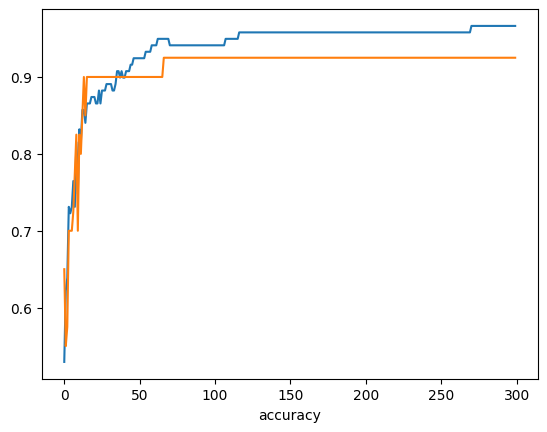

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.xlabel('accuracy')
plt.show()

따라서 optimal epoch는 100이라고 추정할 수 있겠다.

In [35]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # tolerance를 None으로 설정 즉, 100번을 무조건 반복
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [37]:
# hinge는 support vector machine이라는 머신러닝 알고리즘을 위한 loss function임. 이를 SGDClassifier에서도 사용 가능
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # loss function을 hinge로 설정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
